In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
states_H = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')

In [4]:
states_H['date'] = pd.to_datetime(states_H['date'], format='%Y%m%d')

In [5]:
states_H.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-15,AK,293.0,8371.0,NaN,NaN,34.0,NaN,NaN,NaN,...,34.0,8664.0,8664.0,8664.0,2,0.0,2.0,308.0,8.0,316.0
1,2020-04-15,AL,4113.0,29964.0,NaN,NaN,525.0,NaN,219.0,NaN,...,525.0,34077.0,34077.0,34077.0,1,11.0,32.0,723.0,237.0,960.0
2,2020-04-15,AR,1569.0,20265.0,NaN,83.0,130.0,NaN,43.0,26.0,...,130.0,21834.0,21834.0,21834.0,5,3.0,0.0,614.0,89.0,703.0
3,2020-04-15,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-15,AZ,3962.0,41348.0,NaN,590.0,NaN,286.0,NaN,202.0,...,NaN,45310.0,45310.0,45310.0,4,11.0,0.0,1058.0,156.0,1214.0


In [6]:
states_H['prev_day_positive'] = states_H['positive'] - states_H['positiveIncrease']

In [7]:
states_H['positive_increase_rate'] = states_H['positiveIncrease'] / states_H['prev_day_positive'] * 100

In [8]:
state = 'NJ'

## Trends for the state {{state}}

In [9]:
state_query = str.format("state == '{}'", state)

In [10]:
state_df = states_H.query(state_query).sort_values(by='date')

### Daily Cumulative Positive Cases

In [11]:
state_df.plot(kind='bar',x='date', y='positive', label='Cumulative Positive')

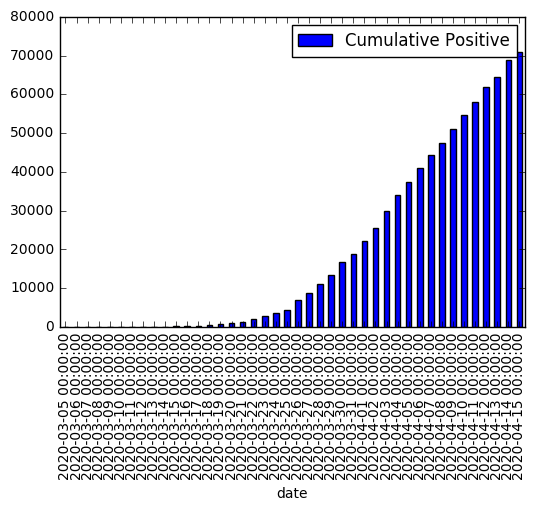

In [12]:
plt.show()

### Daily Cumulative recovered cases

In [13]:
state_df.plot(kind='bar', x='date', y='recovered')

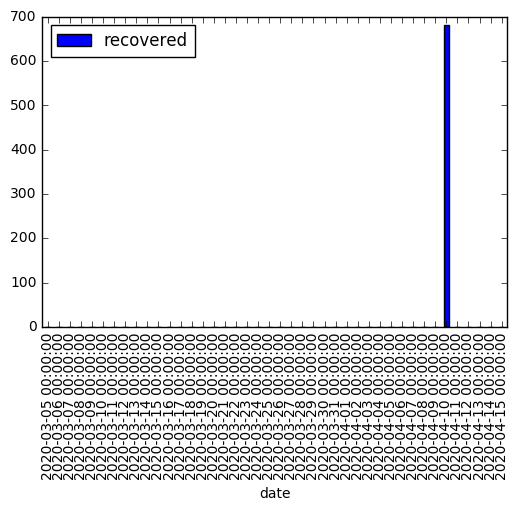

In [14]:
plt.show()

### Daily positive Case counts

In [15]:
state_df.plot(kind='bar', stacked=True, x='date', y='positiveIncrease', label="Daily Positive Cases", title='Daily')

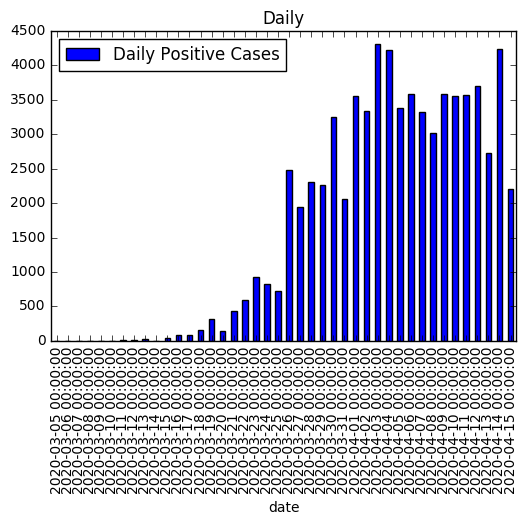

In [16]:
plt.show()

### Daily positive cases increase rate - relative to cumulative positie cases

In [17]:
state_df.plot(kind='bar', x='date', y='positive_increase_rate')

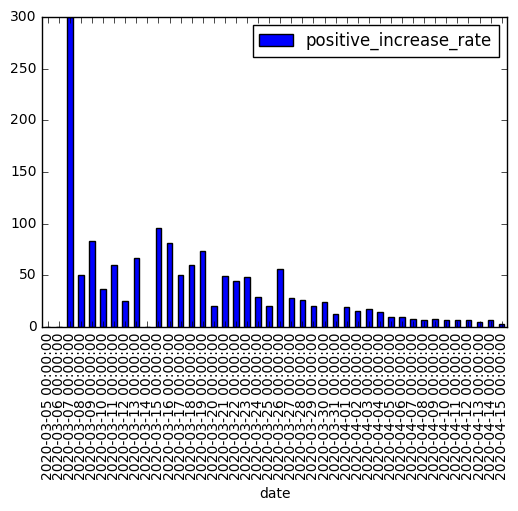

In [18]:
plt.show()